# **Load Dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (25000,)
train_label :  (25000,)
test_data :  (25000,)
test_label :  (25000,)


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_label[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

# **Decode one of these reviews back to English words**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [ ]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# **Encoding the integer sequence into a binary matrix**

In [ ]:
import numpy as np

def vectorizer_sequence(sequence , dimension=10000):
  results = np.zeros((len(sequence),dimension))
  for i, sequence in enumerate(sequence):
    results[i,sequence] = 1.
  return results

In [ ]:
train_data = vectorizer_sequence(train_data)
test_data = vectorizer_sequence(test_data)

In [ ]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

# **Vectorizing Label data**

In [ ]:
train_label = np.asarray(train_label).astype("float32")
test_label = np.asarray(test_label).astype("float32")

# **Model**

In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16,activation="relu",input_shape=(10000,)),
                                    tf.keras.layers.Dense(16,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

# **Compile The Model**

In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

# **Setting aside a Validation set**

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_label[:10000]
partial_y_train = train_label[10000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5542 - accuracy: 0.7585 - val_loss: 0.4403 - val_accuracy: 0.8439
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3553 - accuracy: 0.8871 - val_loss: 0.3383 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2635 - accuracy: 0.9159 - val_loss: 0.2928 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2131 - accuracy: 0.9298 - val_loss: 0.2826 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1772 - accuracy: 0.9423 - val_loss: 0.2799 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1512 - accuracy: 0.9513 - val_loss: 0.2836 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 4s 126ms/step - loss: 0.1345 - accuracy: 0.9572 - val_loss: 0.2950 - val_accuracy: 0.8838
Epoch 8/20
3

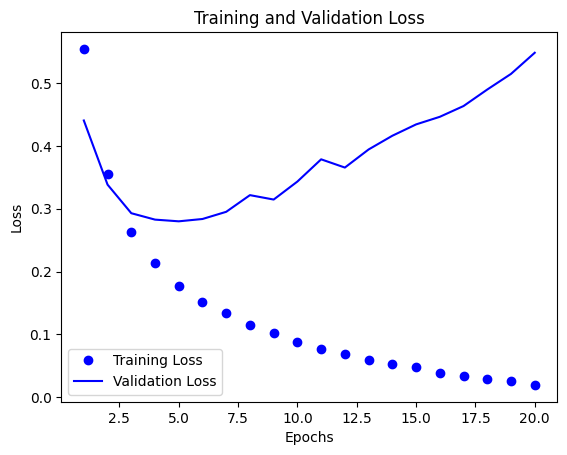

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

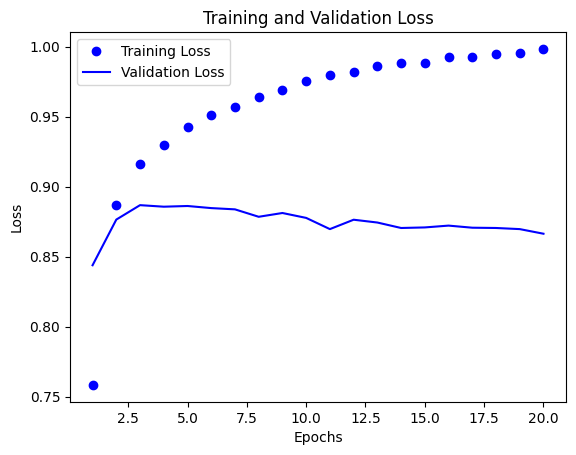

In [ ]:
from os import access
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Loss")
plt.plot(epochs, val_acc, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Model Evaluate**

In [ ]:
model.evaluate(test_data,test_label)

782/782 [==============================] - 3s 3ms/step - loss: 0.5911 - accuracy: 0.8554


[0.5910815596580505, 0.855400025844574]